In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_simple = X[y != 2]  # Remove class 2
y_simple = y[y != 2]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y_simple, test_size=0.3, random_state=42, stratify=y_simple
)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron.fit(X_train_scaled, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.1
,n_jobs,None
,random_state,42



Model Accuracy: 100.00%

--- Classification Report ---
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


--- Confusion Matrix ---
[[15  0]
 [ 0 15]]


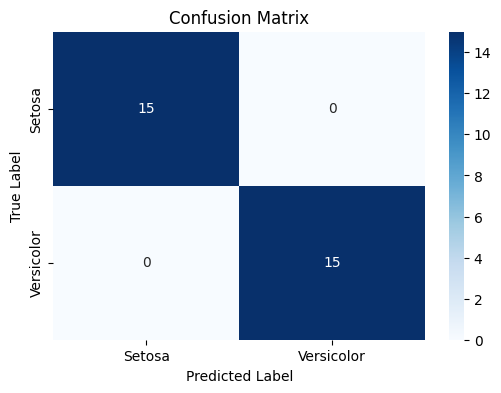

In [8]:
y_pred = perceptron.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor']))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor'],
            yticklabels=['Setosa', 'Versicolor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

